#**SRIP (SCOPE Research Internship Programme)**

**Research Problem Statement :**


**Application of Regression Techniques in Machine Learning on Superconductivity Data to predict the Critical Temperature of a Material**

**Efforts By : Sparsh Saxena 21BCE6015** <br>
**Faculty Coordinator : Dr. M. Raja**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import of libraries and the dataset important for use**

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

import pickle as pk

In [9]:
# Fetching the dataset
# View this on https://archive.ics.uci.edu/dataset/464/superconductivty+data

df = pd.read_csv('/content/drive/My Drive/superconductivity_data.csv')
df.head(5)

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

**Data Preprocessing**

In [10]:
# Checking for null values
print("The number of null values in each column : ")
df.isnull().sum()

The number of null values in each column : 


number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

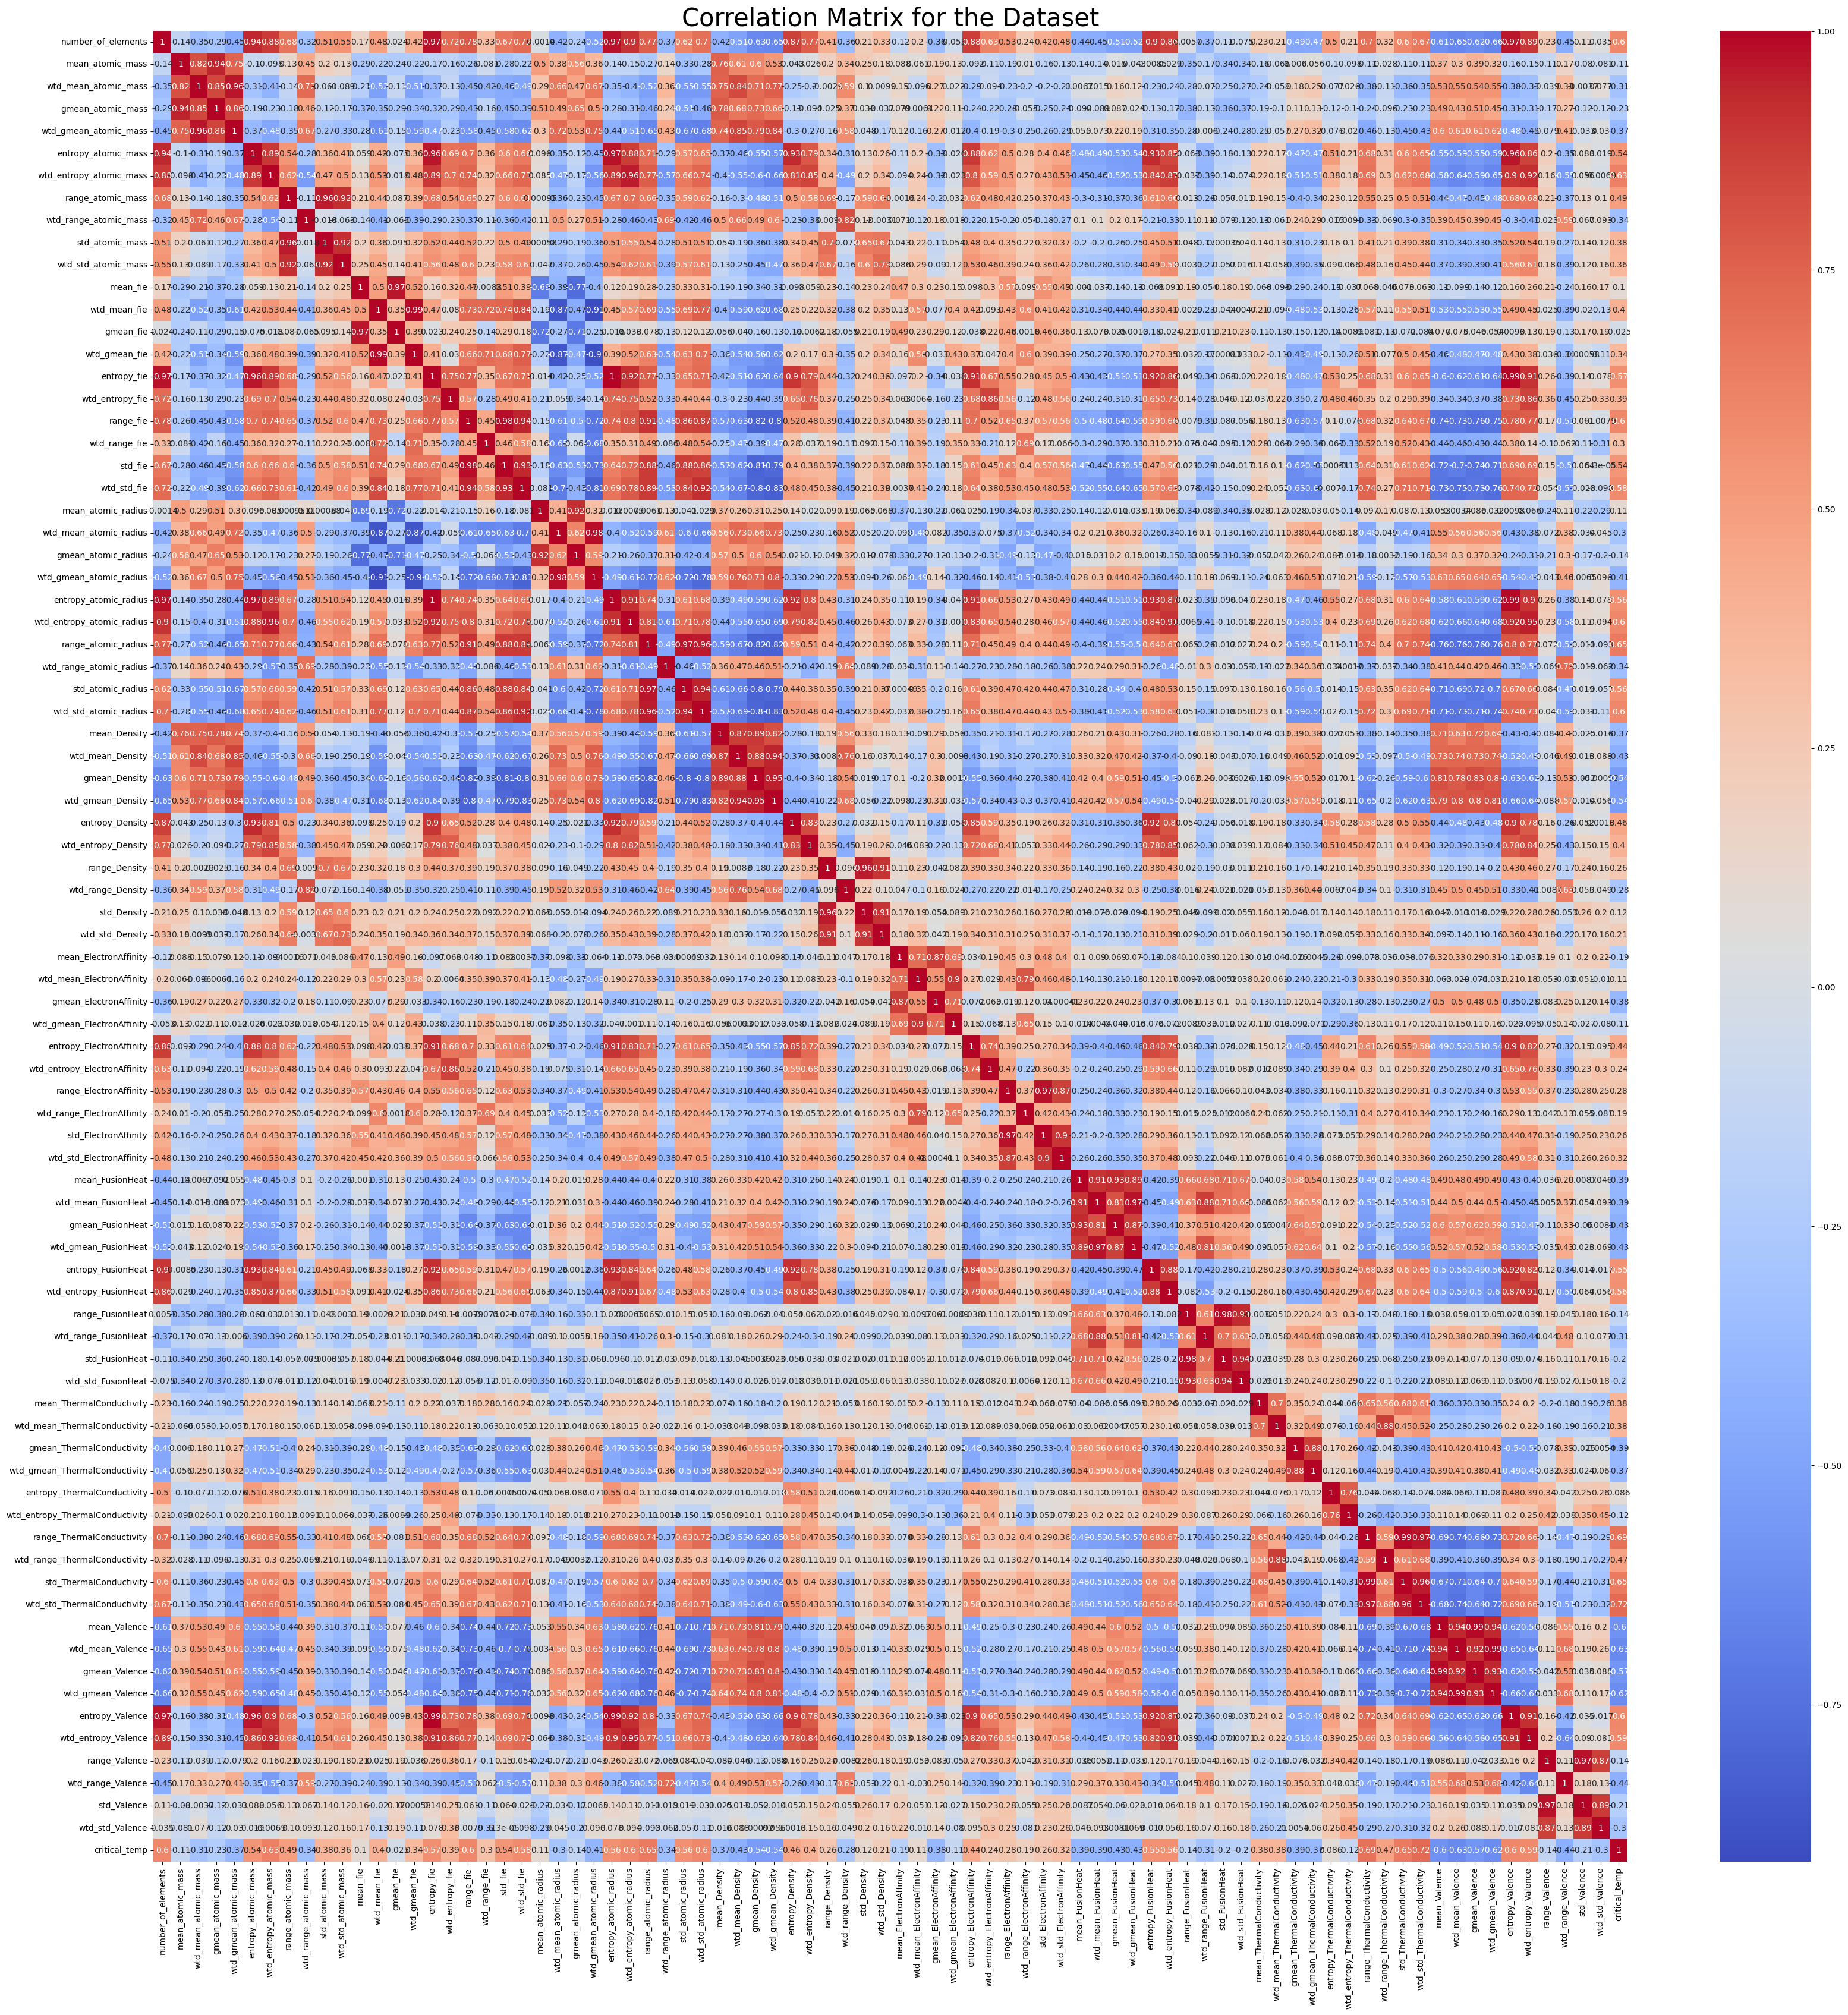

In [6]:
# Checking for highly inter-correlated and less-correlated features to the target column from the dataset

plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for the Dataset",fontsize=30)
plt.show()

# We can clearly see there are features which are redundant

In [11]:
X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

In [12]:
# Dimensionality reduction using the correlation-based feature selection method
# For more information - https://medium.com/@dancerworld60/filtering-out-irrelevant-features-a-comprehensive-survey-of-filter-based-techniques-for-feature-9275d86996ab

corr_matrix = X.corr()

print("No. of features before dimensionality reduction :",X.shape[1])

# Get the column names of the DataFrame in the order of decreasing correlation from target variable
columns = list(sorted(corr_matrix.columns,key = lambda x: df['critical_temp'].corr(df[x]),reverse = True))

# Create an empty list to keep track of columns to drop
columns_to_drop = set()

# Loop over the columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i],columns[j]] >= 0.87: # multicolinear features removal
            columns_to_drop.add(columns[j])

# Drop the columns from the DataFrame
X = X.drop(columns=list(columns_to_drop))

print("No. of features after dimensionality reduction :",X.shape[1])

# With this we drop the redundant columns from the DataFrame to do dimensionality reduction.

No. of features before dimensionality reduction : 81
No. of features after dimensionality reduction : 35


In [13]:
# Seeing the retained features from the DataFrame

print("The retained columns : \n")
for col in X.columns:
  print(col)

The retained columns : 

mean_atomic_mass
wtd_mean_atomic_mass
wtd_entropy_atomic_mass
range_atomic_mass
wtd_range_atomic_mass
mean_fie
wtd_mean_fie
wtd_entropy_fie
wtd_range_fie
mean_atomic_radius
wtd_mean_atomic_radius
range_atomic_radius
wtd_range_atomic_radius
mean_Density
wtd_entropy_Density
range_Density
wtd_range_Density
mean_ElectronAffinity
wtd_mean_ElectronAffinity
wtd_entropy_ElectronAffinity
range_ElectronAffinity
wtd_range_ElectronAffinity
wtd_std_ElectronAffinity
mean_FusionHeat
range_FusionHeat
wtd_range_FusionHeat
mean_ThermalConductivity
wtd_gmean_ThermalConductivity
entropy_ThermalConductivity
wtd_entropy_ThermalConductivity
wtd_range_ThermalConductivity
wtd_std_ThermalConductivity
gmean_Valence
range_Valence
wtd_range_Valence


In [14]:
# Scaling the feature matrix using MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Machine Learning Methods for Regression**

In [ ]:
# Model Training using various Regressor Machine Learning techniques and their evaluation

analysis_data = []

m1 = KNeighborsRegressor()
m2 = RandomForestRegressor()
m3 = XGBRegressor()
m4 = LinearRegression()
m5 = SVR()

models = {
    'KNN_Regressor' : m1,
    'Random_Forest_Regressor' : m2,
    'XG_Boost_Regressor' : m3,
    'Linear_Regression' : m4,
    'Support_Vector_Regressor': m5
}

for model_name in models:
  model = models[model_name]
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  mse = round(mean_squared_error(y_test, pred),2)
  r2 = round(r2_score(y_test, pred)*100,2)
  analysis_data.append([model_name,mse,r2])
  model_pkl_file = model_name+"_model.pkl"
  with open(model_pkl_file, 'wb') as file:
      pk.dump(model, file)

In [ ]:
# Evaluation Results for Conventional Machine Learning methods

display(pd.DataFrame(list(sorted(analysis_data,key = lambda x: x[1])),columns=["Model","MSE","R2-Score(%)"]))

Model     MSE  R2-Score(%)
0   Random_Forest_Regressor   82.81        92.81
1        XG_Boost_Regressor   87.81        92.37
2             KNN_Regressor  106.77        90.72
3  Support_Vector_Regressor  269.07        76.62
4         Linear_Regression  367.49        68.07

In [ ]:
# From repeated testing it was found the KNN Regressor to be working the best on the actual test cases

with open("KNN_Regressor_model.pkl", 'rb') as file:
    mod = pk.load(file)
print("Predicted Temperature from KNN Model : ",mod.predict(np.array(X)[0].reshape(1,-1))[0])
print("Original Temperature for the test case : ",np.array(y)[0])

Predicted Temperature from KNN Model :  26.48
Original Temperature for the test case :  29.0


**Artificial Neural Networks for Regression**

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.models import load_model
import tensorflow as tf

In [ ]:
# Model Building

hidden_units1 = 295
hidden_units2 = 196
learning_rate = 0.001

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

# Building the model
model = build_model_using_sequential()

In [ ]:
# Model Training

# Loss function
msle = MeanSquaredLogarithmicError()
r2score = R2Score()

# Compiling the model
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle,r2score]
)

# Training the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
213/213 [==============================] - 2s 5ms/step - loss: 0.2545 - mean_squared_logarithmic_error: 0.2544 - r2_score: 0.7636 - val_loss: 0.2489 - val_mean_squared_logarithmic_error: 0.2481 - val_r2_score: 0.7913
Epoch 2/50
213/213 [==============================] - 1s 4ms/step - loss: 0.2522 - mean_squared_logarithmic_error: 0.2523 - r2_score: 0.7611 - val_loss: 0.2559 - val_mean_squared_logarithmic_error: 0.2547 - val_r2_score: 0.7792
Epoch 3/50
213/213 [==============================] - 1s 5ms/step - loss: 0.2526 - mean_squared_logarithmic_error: 0.2527 - r2_score: 0.7664 - val_loss: 0.2558 - val_mean_squared_logarithmic_error: 0.2540 - val_r2_score: 0.7558
Epoch 4/50
213/213 [==============================] - 1s 4ms/step - loss: 0.2497 - mean_squared_logarithmic_error: 0.2497 - r2_score: 0.7642 - val_loss: 0.2527 - val_mean_squared_logarithmic_error: 0.2521 - val_r2_score: 0.7788
Epoch 5/50
213/213 [==============================] - 1s 4ms/step - loss: 0.2455 - mean_

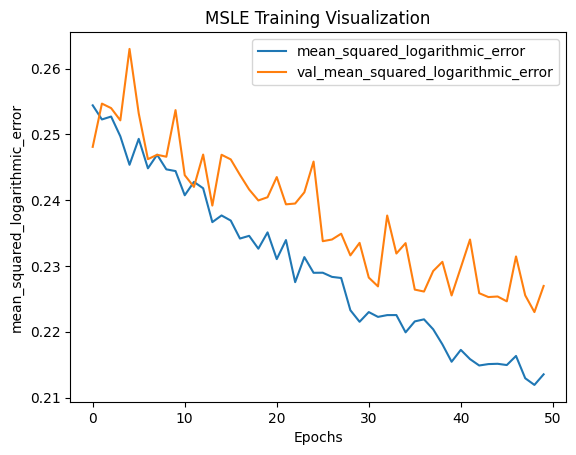

In [ ]:
# Visualization for the training loss - MSLE

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

# Plot the history
plt.title("MSLE Training Visualization")
plot_history(history, 'mean_squared_logarithmic_error')

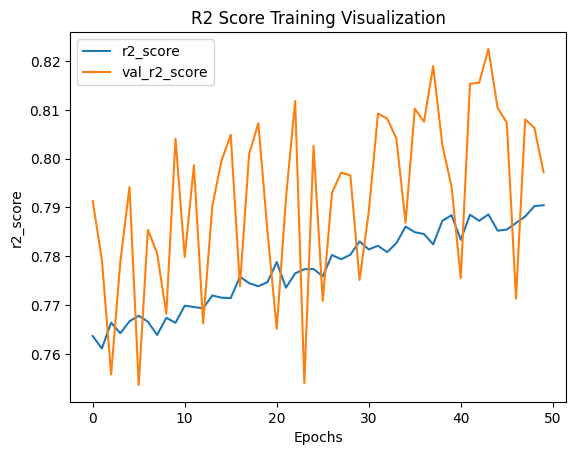

In [ ]:
# Visualization for the other metric - R2 Score

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

# Plot the history
plt.title("R2 Score Training Visualization")
plot_history(history, 'r2_score')

In [ ]:
# Final R2-Score and MSE from the ANN model

y_pred_ann = model.predict(X_test)
r2 = r2_score(y_test, y_pred_ann)
mse = mean_squared_error(y_test, y_pred_ann)
print("R2-Score from ANN model (%): ",round(r2*100,2))
print("MSE from ANN model : ",round(mse,2))

133/133 [==============================] - 0s 2ms/step
R2-Score from ANN model (%):  80.84
MSE from ANN model :  220.5


In [ ]:
# Saving the model

ann_model = 'ANN_Regression_model.h5'
model.save(ann_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Using the ANN model from saved file

model1 = load_model(ann_model,compile=False)
print("Predicted critical temperature : ",model1.predict(np.array(X)[0].reshape(1,-1))[0][0])
print("Original critical temperature : ",np.array(y)[0])

1/1 [==============================] - 0s 50ms/step
Predicted critical temperature :  23.41205
Original critical temperature :  29.0


**Genetic Algorithm Optimized Linear Regression**

In [16]:
from random import random, sample, choice
from math import floor
from tqdm import tqdm
from numpy import array, dot, mean
from numpy.linalg import pinv

The step-wise function definitions required for GA-Based Approach are as follows :

In [17]:
def multiple_linear_regression(inputs, outputs):
    X, Y = array(inputs), array(outputs)
    X_t, Y_t = X.transpose(), Y.transpose()
    coeff = dot((pinv((dot(X_t, X)))), (dot(X_t, Y)))
    Y_p = dot(X, coeff)
    Y_mean = mean(Y)
    SST = array([(i - Y_mean) ** 2 for i in Y]).sum()
    SSR = array([(i - j) ** 2 for i, j in zip(Y, Y_p)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(Y))
    return {'COD': COD, 'coeff': coeff, 'error': av_error}

In [18]:
def check_termination_condition(best_individual):
    if ((best_individual['COD'] >= 98.0)
            or (generation_count == max_generations)):
        return True
    else:
        return False

In [19]:
def create_individual(individual_size):
    return [random() for i in range(individual_size)]

def create_population(individual_size, population_size):
    return [create_individual(individual_size) for i in range(population_size)]

In [20]:
def get_fitness(individual, inputs):
    predicted_outputs = dot(array(inputs), array(individual))
    output_mean = mean(outputs)
    SST = array(
        [(i - output_mean) ** 2 for i in outputs]
        ).sum()
    SSR = array(
        [(i - j) ** 2 for i, j in zip(outputs, predicted_outputs)]
        ).sum()
    COD = (1 - (SSR / SST)) * 100.0
    average_error = (SSR / len(outputs))
    return {'COD': COD, 'error': average_error, 'coeff': individual}

In [21]:
def evaluate_population(population):
    fitness_list = [get_fitness(individual, inputs)
                    for individual in tqdm(population)]
    error_list = sorted(fitness_list, key=lambda i: i['error'])
    best_individuals = error_list[: selection_size]
    best_individuals_stash.append(best_individuals[0]['coeff'])
    print('Error: ', best_individuals[0]['error'],
          'COD or R2-Score(%): ', best_individuals[0]['COD'])
    return best_individuals

In [22]:
def crossover(parent_1, parent_2):
    child = {}
    loci = [i for i in range(0, individual_size)]
    loci_1 = sample(loci, floor(0.5*(individual_size)))
    loci_2 = [i for i in loci if i not in loci_1]
    chromosome_1 = [[i, parent_1['coeff'][i]] for i in loci_1]
    chromosome_2 = [[i, parent_2['coeff'][i]] for i in loci_2]
    child.update({key: value for (key, value) in chromosome_1})
    child.update({key: value for (key, value) in chromosome_2})
    return [child[i] for i in loci]

In [23]:
def mutate(individual):
    loci = [i for i in range(0, individual_size)]
    no_of_genes_mutated = floor(probability_of_gene_mutating*individual_size)
    loci_to_mutate = sample(loci, no_of_genes_mutated)
    for locus in loci_to_mutate:
        gene_transform = choice([-1, 1])
        change = gene_transform*random()
        individual[locus] = individual[locus] + change
    return individual

In [24]:
def get_new_generation(selected_individuals):
    parent_pairs = [sample(selected_individuals, 2)
                    for i in range(population_size)]
    offspring = [crossover(pair[0], pair[1]) for pair in parent_pairs]
    offspring_indices = [i for i in range(population_size)]
    offspring_to_mutate = sample(
        offspring_indices,
        floor(probability_of_individual_mutating*population_size)
    )
    mutated_offspring = [[i, mutate(offspring[i])]
                         for i in offspring_to_mutate]
    for child in mutated_offspring:
        offspring[child[0]] = child[1]
    return offspring

The main portion where we use the dataset to train the model coefficients for 100 Generations:

In [25]:
inputs, outputs = X,y
individual_size = len(inputs[0])
population_size = 1000
selection_size = floor(0.1*population_size)
max_generations = 100
probability_of_individual_mutating = 0.1
probability_of_gene_mutating = 0.25
best_possible = multiple_linear_regression(inputs, outputs)
best_individuals_stash = [create_individual(individual_size)]
initial_population = create_population(individual_size, 1000)
current_population = initial_population
termination = False
generation_count = 0
while termination is False:
    current_best_individual = get_fitness(best_individuals_stash[-1], inputs)
    print('Generation: ', generation_count)
    best_individuals = evaluate_population(current_population)
    current_population = get_new_generation(best_individuals)
    termination = check_termination_condition(current_best_individual)
    generation_count += 1
else:
    print(get_fitness(best_individuals_stash[-1], inputs))

Generation:  0


100%|██████████| 1000/1000 [00:50<00:00, 19.82it/s]


Error:  1850.9338828076998 COD or R2-Score(%):  -57.753699788605026
Generation:  1


100%|██████████| 1000/1000 [00:46<00:00, 21.66it/s]


Error:  1804.2395248890598 COD or R2-Score(%):  -53.7739748565913
Generation:  2


100%|██████████| 1000/1000 [00:57<00:00, 17.37it/s]


Error:  1735.3930032122776 COD or R2-Score(%):  -47.90623770348783
Generation:  3


100%|██████████| 1000/1000 [00:47<00:00, 20.90it/s]


Error:  1707.3205226982755 COD or R2-Score(%):  -45.51364134742042
Generation:  4


100%|██████████| 1000/1000 [00:49<00:00, 20.34it/s]


Error:  1640.0710290813474 COD or R2-Score(%):  -39.78201769218328
Generation:  5


100%|██████████| 1000/1000 [00:47<00:00, 21.19it/s]


Error:  1551.6526748717092 COD or R2-Score(%):  -32.246188003533646
Generation:  6


100%|██████████| 1000/1000 [00:46<00:00, 21.66it/s]


Error:  1492.1838225214203 COD or R2-Score(%):  -27.177702539207083
Generation:  7


100%|██████████| 1000/1000 [00:48<00:00, 20.66it/s]


Error:  1439.1270230389057 COD or R2-Score(%):  -22.655711508056676
Generation:  8


100%|██████████| 1000/1000 [00:45<00:00, 21.81it/s]


Error:  1349.2935927586195 COD or R2-Score(%):  -14.999275952444124
Generation:  9


100%|██████████| 1000/1000 [00:48<00:00, 20.67it/s]


Error:  1290.8364927302646 COD or R2-Score(%):  -10.017021375961432
Generation:  10


100%|██████████| 1000/1000 [00:48<00:00, 20.56it/s]


Error:  1263.6997453908286 COD or R2-Score(%):  -7.70417685310314
Generation:  11


100%|██████████| 1000/1000 [00:46<00:00, 21.64it/s]


Error:  1195.0815101956628 COD or R2-Score(%):  -1.8558963847690402
Generation:  12


100%|██████████| 1000/1000 [00:46<00:00, 21.45it/s]


Error:  1155.746041603453 COD or R2-Score(%):  1.4966359563249987
Generation:  13


100%|██████████| 1000/1000 [00:48<00:00, 20.74it/s]


Error:  1095.3780410313793 COD or R2-Score(%):  6.641755145909068
Generation:  14


100%|██████████| 1000/1000 [00:48<00:00, 20.50it/s]


Error:  1075.935649278952 COD or R2-Score(%):  8.29881554129841
Generation:  15


100%|██████████| 1000/1000 [00:45<00:00, 21.76it/s]


Error:  1035.3461479926907 COD or R2-Score(%):  11.758228143745919
Generation:  16


100%|██████████| 1000/1000 [00:49<00:00, 20.38it/s]


Error:  1022.8764445794387 COD or R2-Score(%):  12.821011567280816
Generation:  17


100%|██████████| 1000/1000 [00:48<00:00, 20.48it/s]


Error:  991.198244285784 COD or R2-Score(%):  15.520920702548235
Generation:  18


100%|██████████| 1000/1000 [00:45<00:00, 21.74it/s]


Error:  963.7320443495717 COD or R2-Score(%):  17.861844221922375
Generation:  19


100%|██████████| 1000/1000 [00:48<00:00, 20.57it/s]


Error:  944.473112242917 COD or R2-Score(%):  19.50326848997549
Generation:  20


100%|██████████| 1000/1000 [00:48<00:00, 20.76it/s]


Error:  923.1774267375314 COD or R2-Score(%):  21.318283715107743
Generation:  21


100%|██████████| 1000/1000 [00:46<00:00, 21.58it/s]


Error:  903.7268835303925 COD or R2-Score(%):  22.976038852838442
Generation:  22


100%|██████████| 1000/1000 [00:48<00:00, 20.44it/s]


Error:  884.9143890423436 COD or R2-Score(%):  24.57941357913642
Generation:  23


100%|██████████| 1000/1000 [00:48<00:00, 20.61it/s]


Error:  874.1206383212176 COD or R2-Score(%):  25.499356817881736
Generation:  24


100%|██████████| 1000/1000 [00:46<00:00, 21.55it/s]


Error:  865.7653932253297 COD or R2-Score(%):  26.211468060082076
Generation:  25


100%|██████████| 1000/1000 [00:48<00:00, 20.59it/s]


Error:  856.6765467122871 COD or R2-Score(%):  26.986103598153434
Generation:  26


100%|██████████| 1000/1000 [00:49<00:00, 20.15it/s]


Error:  844.9140571536318 COD or R2-Score(%):  27.988611717885924
Generation:  27


100%|██████████| 1000/1000 [00:46<00:00, 21.40it/s]


Error:  831.7289336923637 COD or R2-Score(%):  29.112369852903363
Generation:  28


100%|██████████| 1000/1000 [00:49<00:00, 20.14it/s]


Error:  823.0918658730626 COD or R2-Score(%):  29.848500633411323
Generation:  29


100%|██████████| 1000/1000 [00:47<00:00, 21.00it/s]


Error:  808.4592109099335 COD or R2-Score(%):  31.095630787332396
Generation:  30


100%|██████████| 1000/1000 [00:47<00:00, 21.05it/s]


Error:  797.9346635457204 COD or R2-Score(%):  31.992630026865765
Generation:  31


100%|██████████| 1000/1000 [00:47<00:00, 21.07it/s]


Error:  789.038832493805 COD or R2-Score(%):  32.750815002660396
Generation:  32


100%|██████████| 1000/1000 [00:47<00:00, 20.85it/s]


Error:  777.2910969470444 COD or R2-Score(%):  33.75206564907916
Generation:  33


100%|██████████| 1000/1000 [00:49<00:00, 20.41it/s]


Error:  765.8331429086213 COD or R2-Score(%):  34.72861843594972
Generation:  34


100%|██████████| 1000/1000 [00:46<00:00, 21.66it/s]


Error:  751.9352700824063 COD or R2-Score(%):  35.91312366214462
Generation:  35


100%|██████████| 1000/1000 [00:48<00:00, 20.41it/s]


Error:  746.1611571388377 COD or R2-Score(%):  36.40524695639405
Generation:  36


100%|██████████| 1000/1000 [00:48<00:00, 20.53it/s]


Error:  742.1493153712006 COD or R2-Score(%):  36.747173206537134
Generation:  37


100%|██████████| 1000/1000 [00:46<00:00, 21.49it/s]


Error:  729.8465082149693 COD or R2-Score(%):  37.795732187875345
Generation:  38


100%|██████████| 1000/1000 [00:48<00:00, 20.45it/s]


Error:  721.9961058695811 COD or R2-Score(%):  38.464816062949005
Generation:  39


100%|██████████| 1000/1000 [00:49<00:00, 20.39it/s]


Error:  713.4555117331149 COD or R2-Score(%):  39.19272446418085
Generation:  40


100%|██████████| 1000/1000 [00:46<00:00, 21.39it/s]


Error:  711.0940996244032 COD or R2-Score(%):  39.39398583841742
Generation:  41


100%|██████████| 1000/1000 [00:48<00:00, 20.46it/s]


Error:  703.6441065438329 COD or R2-Score(%):  40.028943133637874
Generation:  42


100%|██████████| 1000/1000 [00:49<00:00, 20.35it/s]


Error:  694.8312976190671 COD or R2-Score(%):  40.780052196109054
Generation:  43


100%|██████████| 1000/1000 [00:46<00:00, 21.35it/s]


Error:  687.8137596219991 COD or R2-Score(%):  41.37815167050266
Generation:  44


100%|██████████| 1000/1000 [00:48<00:00, 20.57it/s]


Error:  681.8416298135402 COD or R2-Score(%):  41.887151792902
Generation:  45


100%|██████████| 1000/1000 [00:49<00:00, 20.31it/s]


Error:  675.6141823696121 COD or R2-Score(%):  42.41791244494028
Generation:  46


100%|██████████| 1000/1000 [00:46<00:00, 21.50it/s]


Error:  670.6622754778712 COD or R2-Score(%):  42.839959737086566
Generation:  47


100%|██████████| 1000/1000 [00:49<00:00, 20.34it/s]


Error:  664.469825942549 COD or R2-Score(%):  43.36773754375217
Generation:  48


100%|██████████| 1000/1000 [00:49<00:00, 20.31it/s]


Error:  653.2243427719168 COD or R2-Score(%):  44.32618159869956
Generation:  49


100%|██████████| 1000/1000 [00:46<00:00, 21.50it/s]


Error:  646.4782732685667 COD or R2-Score(%):  44.901144017978545
Generation:  50


100%|██████████| 1000/1000 [00:49<00:00, 20.30it/s]


Error:  641.1537820587071 COD or R2-Score(%):  45.354946390742455
Generation:  51


100%|██████████| 1000/1000 [00:49<00:00, 20.38it/s]


Error:  632.7776160468264 COD or R2-Score(%):  46.06884070684484
Generation:  52


100%|██████████| 1000/1000 [00:47<00:00, 21.22it/s]


Error:  625.8899271077097 COD or R2-Score(%):  46.65587324389608
Generation:  53


100%|██████████| 1000/1000 [00:48<00:00, 20.51it/s]


Error:  619.0208728789137 COD or R2-Score(%):  47.24131755863162
Generation:  54


100%|██████████| 1000/1000 [00:49<00:00, 20.23it/s]


Error:  613.3961642018998 COD or R2-Score(%):  47.720707239848124
Generation:  55


100%|██████████| 1000/1000 [00:47<00:00, 21.18it/s]


Error:  606.9482660640051 COD or R2-Score(%):  48.27025673838017
Generation:  56


100%|██████████| 1000/1000 [00:49<00:00, 20.37it/s]


Error:  603.6697831329955 COD or R2-Score(%):  48.549679367607766
Generation:  57


100%|██████████| 1000/1000 [00:48<00:00, 20.42it/s]


Error:  599.2448558946759 COD or R2-Score(%):  48.926812581075886
Generation:  58


100%|██████████| 1000/1000 [00:50<00:00, 19.65it/s]


Error:  596.65682898744 COD or R2-Score(%):  49.14738816379178
Generation:  59


100%|██████████| 1000/1000 [00:49<00:00, 20.28it/s]


Error:  589.9450257005661 COD or R2-Score(%):  49.71943009926684
Generation:  60


100%|██████████| 1000/1000 [00:50<00:00, 19.67it/s]


Error:  584.2162350826738 COD or R2-Score(%):  50.20769060585818
Generation:  61


100%|██████████| 1000/1000 [00:49<00:00, 20.39it/s]


Error:  581.681110564291 COD or R2-Score(%):  50.4237573578445
Generation:  62


100%|██████████| 1000/1000 [00:49<00:00, 20.04it/s]


Error:  577.632027044387 COD or R2-Score(%):  50.76885769446431
Generation:  63


100%|██████████| 1000/1000 [00:52<00:00, 19.19it/s]


Error:  573.0014791349183 COD or R2-Score(%):  51.163515802758795
Generation:  64


100%|██████████| 1000/1000 [00:47<00:00, 20.93it/s]


Error:  569.4209666330856 COD or R2-Score(%):  51.46868018466889
Generation:  65


100%|██████████| 1000/1000 [00:51<00:00, 19.48it/s]


Error:  565.830314509709 COD or R2-Score(%):  51.77470875888097
Generation:  66


100%|██████████| 1000/1000 [00:51<00:00, 19.58it/s]


Error:  561.5848990406936 COD or R2-Score(%):  52.13654231954875
Generation:  67


100%|██████████| 1000/1000 [00:46<00:00, 21.39it/s]


Error:  556.5075471885741 COD or R2-Score(%):  52.569281191120645
Generation:  68


100%|██████████| 1000/1000 [00:49<00:00, 20.39it/s]


Error:  555.2518759650013 COD or R2-Score(%):  52.676301103110255
Generation:  69


100%|██████████| 1000/1000 [00:51<00:00, 19.52it/s]


Error:  552.1961986564571 COD or R2-Score(%):  52.93673417706304
Generation:  70


100%|██████████| 1000/1000 [00:47<00:00, 21.15it/s]


Error:  550.0111669236688 COD or R2-Score(%):  53.12296278479698
Generation:  71


100%|██████████| 1000/1000 [00:49<00:00, 20.24it/s]


Error:  545.4787729046984 COD or R2-Score(%):  53.50925531098258
Generation:  72


100%|██████████| 1000/1000 [00:51<00:00, 19.28it/s]


Error:  542.1441077589782 COD or R2-Score(%):  53.79346630802559
Generation:  73


100%|██████████| 1000/1000 [00:47<00:00, 21.25it/s]


Error:  539.1822559662397 COD or R2-Score(%):  54.04590270398224
Generation:  74


100%|██████████| 1000/1000 [00:49<00:00, 20.13it/s]


Error:  535.773002499772 COD or R2-Score(%):  54.336470807385574
Generation:  75


100%|██████████| 1000/1000 [00:51<00:00, 19.34it/s]


Error:  534.0128449764561 COD or R2-Score(%):  54.48648770647255
Generation:  76


100%|██████████| 1000/1000 [00:48<00:00, 20.46it/s]


Error:  531.6061401464793 COD or R2-Score(%):  54.69160934520555
Generation:  77


100%|██████████| 1000/1000 [00:48<00:00, 20.78it/s]


Error:  526.7778609161758 COD or R2-Score(%):  55.10311994494532
Generation:  78


100%|██████████| 1000/1000 [00:52<00:00, 19.23it/s]


Error:  525.2387516186994 COD or R2-Score(%):  55.23429707034735
Generation:  79


100%|██████████| 1000/1000 [00:51<00:00, 19.38it/s]


Error:  523.4097371454059 COD or R2-Score(%):  55.39018259538366
Generation:  80


100%|██████████| 1000/1000 [00:48<00:00, 20.68it/s]


Error:  520.7225767696698 COD or R2-Score(%):  55.61920724890326
Generation:  81


100%|██████████| 1000/1000 [00:51<00:00, 19.47it/s]


Error:  519.4484777911399 COD or R2-Score(%):  55.72779774455894
Generation:  82


100%|██████████| 1000/1000 [00:49<00:00, 20.13it/s]


Error:  516.908904972885 COD or R2-Score(%):  55.944243621790676
Generation:  83


100%|██████████| 1000/1000 [00:49<00:00, 20.20it/s]


Error:  515.6915784550433 COD or R2-Score(%):  56.047995443411125
Generation:  84


100%|██████████| 1000/1000 [00:49<00:00, 20.18it/s]


Error:  513.8334198075542 COD or R2-Score(%):  56.20636490444825
Generation:  85


100%|██████████| 1000/1000 [00:49<00:00, 20.08it/s]


Error:  511.7650767588776 COD or R2-Score(%):  56.38264822358325
Generation:  86


100%|██████████| 1000/1000 [00:50<00:00, 19.99it/s]


Error:  509.0246376359558 COD or R2-Score(%):  56.616213784569446
Generation:  87


100%|██████████| 1000/1000 [00:52<00:00, 19.05it/s]


Error:  507.94645727658366 COD or R2-Score(%):  56.70810628397756
Generation:  88


100%|██████████| 1000/1000 [00:50<00:00, 19.90it/s]


Error:  506.25197300656623 COD or R2-Score(%):  56.85252590118364
Generation:  89


100%|██████████| 1000/1000 [00:50<00:00, 19.90it/s]


Error:  504.9224109190759 COD or R2-Score(%):  56.965843475813635
Generation:  90


100%|██████████| 1000/1000 [00:49<00:00, 20.01it/s]


Error:  503.06214063374125 COD or R2-Score(%):  57.1243929101528
Generation:  91


100%|██████████| 1000/1000 [00:52<00:00, 19.19it/s]


Error:  501.229057968829 COD or R2-Score(%):  57.28062516409458
Generation:  92


100%|██████████| 1000/1000 [00:50<00:00, 19.83it/s]


Error:  499.90652497420405 COD or R2-Score(%):  57.393343654437466
Generation:  93


100%|██████████| 1000/1000 [00:50<00:00, 19.75it/s]


Error:  497.5916331309985 COD or R2-Score(%):  57.59064014150712
Generation:  94


100%|██████████| 1000/1000 [00:50<00:00, 19.82it/s]


Error:  496.4183809443894 COD or R2-Score(%):  57.690635541095304
Generation:  95


100%|██████████| 1000/1000 [00:50<00:00, 19.97it/s]


Error:  494.70191579739077 COD or R2-Score(%):  57.83692857187957
Generation:  96


100%|██████████| 1000/1000 [00:50<00:00, 19.83it/s]


Error:  493.9867106863428 COD or R2-Score(%):  57.89788496444632
Generation:  97


100%|██████████| 1000/1000 [00:50<00:00, 19.66it/s]


Error:  492.7993394925601 COD or R2-Score(%):  57.99908371637446
Generation:  98


100%|██████████| 1000/1000 [00:51<00:00, 19.37it/s]


Error:  491.21189799052263 COD or R2-Score(%):  58.134380159143404
Generation:  99


100%|██████████| 1000/1000 [00:50<00:00, 19.75it/s]


Error:  490.3100661816272 COD or R2-Score(%):  58.21124260450774
Generation:  100


100%|██████████| 1000/1000 [00:50<00:00, 19.78it/s]


Error:  488.7642258563302 COD or R2-Score(%):  58.342993410337776
{'COD': 58.342993410337776, 'error': 488.7642258563302, 'coeff': [-2.288883618308785, -2.6940949643349423, 14.37917935720041, 12.214581920894489, -6.584401360461047, 0.8348088797775822, 1.6539544952176761, 6.333968335838223, 4.489256094294288, 5.700502112289965, 2.5228150269933516, 20.60866679896782, -2.1284944209051866, -7.885470064943143, 5.720249216389284, 2.7036641392195095, -2.037651401201342, -6.225497720327342, -3.844646281887579, -3.481700474647035, 3.025692552760201, -3.5100345457443107, 2.549603981009403, -4.868273186606164, -10.039802418982138, -3.613965703381885, 12.258207492095318, -3.145943525182687, 5.516131110506464, -4.69744008500502, 12.354430936811234, 26.152386969011328, -12.011223617220088, -12.624991745198086, -4.8275195808093985]}


Results after training using Genetic Algorithm Based Multiple Linear Regression

In [26]:
# We have also got the coefficients of training as outputs so if we want we can also predict using the model by crafting an equation
# of the form y (Output) = (Coefficient Matrix)*(Input Feature Matrix)

PARAMETERS_AFTER_TRAINING = get_fitness(best_individuals_stash[-1], inputs)
print("R2-Score (%) :",round(PARAMETERS_AFTER_TRAINING['COD'],2))
print("Mean Squared Error (MSE) :",round(PARAMETERS_AFTER_TRAINING['error'],2))
print("Coefficients for Linear Regression obtained after training : ",PARAMETERS_AFTER_TRAINING['coeff'])

R2-Score (%) : 58.34
Mean Squared Error (MSE) : 488.76
Coefficients for Linear Regression obtained after training :  [-2.288883618308785, -2.6940949643349423, 14.37917935720041, 12.214581920894489, -6.584401360461047, 0.8348088797775822, 1.6539544952176761, 6.333968335838223, 4.489256094294288, 5.700502112289965, 2.5228150269933516, 20.60866679896782, -2.1284944209051866, -7.885470064943143, 5.720249216389284, 2.7036641392195095, -2.037651401201342, -6.225497720327342, -3.844646281887579, -3.481700474647035, 3.025692552760201, -3.5100345457443107, 2.549603981009403, -4.868273186606164, -10.039802418982138, -3.613965703381885, 12.258207492095318, -3.145943525182687, 5.516131110506464, -4.69744008500502, 12.354430936811234, 26.152386969011328, -12.011223617220088, -12.624991745198086, -4.8275195808093985]
